In [17]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

In [18]:
# 设置文件路径
weather_file = r'E:\rgzn\data\Summary_of_Weather.csv'

# 🚀 **1. 读取数据**
weather_data = pd.read_csv(weather_file, low_memory=False)

# 🚀 **2. 强制转换所有列为数值型**
weather_data = weather_data.apply(pd.to_numeric, errors='coerce')

# 🚀 **3. 选择用于建模的特征**
# 由于 RHX 和 RHN 缺失值过多，我们不使用它们
features = weather_data[['Precip', 'WindGustSpd', 'Snowfall']]
target = weather_data['MeanTemp']

In [19]:
# 🚀 **4. 处理缺失值**
print("\n🔍 缺失值统计（处理前）:")
print(features.isnull().sum())

# - 先用均值填充 NaN
features = features.fillna(features.mean())
target = target.fillna(target.mean())

# - 再次检查 NaN 是否全部去除
print("\n✅ 缺失值统计（处理后）:")
print(features.isnull().sum())

# 🚀 **5. 确保数据没有 NaN**
if features.isnull().sum().sum() > 0 or target.isnull().sum() > 0:
    print("❌ 仍然有 NaN，检查数据预处理步骤！")
    exit()



🔍 缺失值统计（处理前）:
Precip          15572
WindGustSpd    110212
Snowfall         1106
dtype: int64

✅ 缺失值统计（处理后）:
Precip         0
WindGustSpd    0
Snowfall       0
dtype: int64


In [20]:
# 🚀 **6. 标准化数据**
scaler = StandardScaler()
features_scaled = scaler.fit_transform(features)

# 🚀 **7. 再次检查 NaN**
if np.isnan(features_scaled).sum() > 0:
    print("❌ 标准化后仍有 NaN！")
    exit()

# 🚀 **8. 划分数据集**
X_train, X_test, y_train, y_test = train_test_split(features_scaled, target, test_size=0.2, random_state=42)


In [21]:
# 🚀 **9. 训练线性回归模型**
model = LinearRegression()
model.fit(X_train, y_train)

# 🚀 **10. 预测**
y_pred = model.predict(X_test)

# 🚀 **11. 计算 MSE 和 R²**
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"\n📈 Mean Squared Error (MSE): {mse:.3f}")
print(f"📊 R^2 Score: {r2:.3f}")


📈 Mean Squared Error (MSE): 61.437
📊 R^2 Score: 0.116


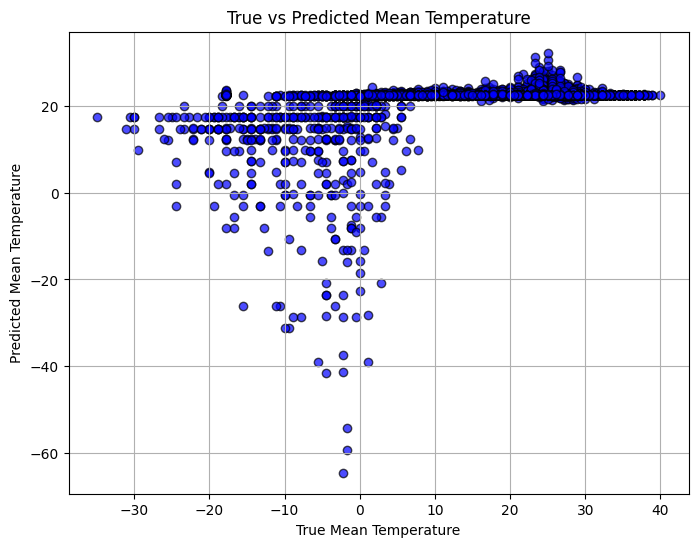

In [22]:
# 🚀 **12. 可视化预测结果**
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, alpha=0.7, color='blue', edgecolor='k')
plt.xlabel("True Mean Temperature")
plt.ylabel("Predicted Mean Temperature")
plt.title("True vs Predicted Mean Temperature")
plt.grid()
plt.show()

In [23]:
# 🚀 **13. 输出线性回归的系数**
print("\n📢 线性回归模型的特征权重:")
for feature, coef in zip(features.columns, model.coef_):
    print(f"{feature}: {coef:.4f}")

# 🚀 **14. 保存模型**
joblib.dump(model, "linear_regression_model.pkl")
print("\n✅ 线性回归模型已保存为 linear_regression_model.pkl")



📢 线性回归模型的特征权重:
Precip: 0.3418
WindGustSpd: 0.0537
Snowfall: -2.6653

✅ 线性回归模型已保存为 linear_regression_model.pkl
